### CS3-mid-p5  

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [38]:
csv_in = 'mid-p5.csv'
df = pd.read_csv(csv_in,sep=',',skiprows=0,header=0)
print(df.shape)
print(df.info())
display(df.head())

(100, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,x,y
0,3.89,15.94
1,1.19,3.52
2,4.12,20.55
3,4.83,30.98
4,4.86,21.34


In [39]:
X = df[['x']]
y = df['y']
print('X:',X.shape)
display(X.head())
print('y:',y.shape)
print(y.head())

X: (100, 1)


,x
0,3.89
1,1.19
2,4.12
3,4.83
4,4.86


y: (100,)
0    15.94
1     3.52
2    20.55
3    30.98
4    21.34
Name: y, dtype: float64


In [40]:
X_c = sm.add_constant(X)
display(X.head())
display(X_c.head())

,x
0,3.89
1,1.19
2,4.12
3,4.83
4,4.86


,const,x
0,1.0,3.89
1,1.0,1.19
2,1.0,4.12
3,1.0,4.83
4,1.0,4.86


In [41]:
model = sm.OLS(y,X_c)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           6.22e-22
Time:                        14:03:41   Log-Likelihood:                -320.47
No. Observations:                 100   AIC:                             644.9
Df Residuals:                      98   BIC:                             650.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8024      1.118      1.613      0.1

In [42]:
print('R2:',results.rsquared)
print('Adj R2:',results.rsquared_adj)

R2: 0.6132358565364777
Adj R2: 0.6092892836439928


In [43]:
print(results.params)

const    1.802399
x        4.940600
dtype: float64


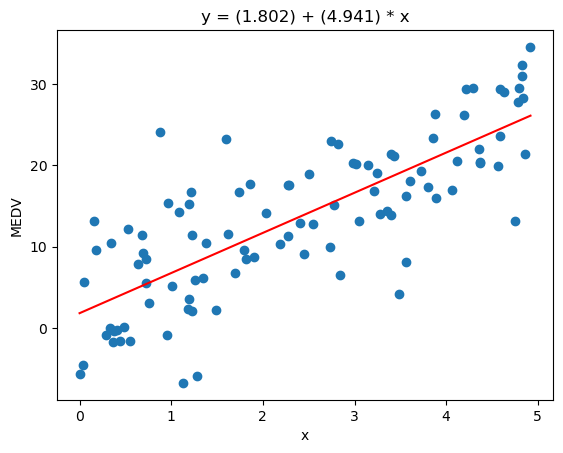

In [44]:
a0 = results.params['const']
a1 = results.params['x']
x_min = X['x'].min()
x_max = X['x'].max()
x_min_max = np.array([x_min,x_max])
y_min_max = a0 + a1 * x_min_max

plt.title('y = ({:.3f}) + ({:.3f}) * x'.format(a0,a1))
plt.scatter(X['x'],y)
plt.plot(x_min_max,y_min_max,c='red')
plt.xlabel('x')
plt.ylabel('MEDV')
plt.show()

In [45]:
a = 1.802399 + 4.940600 * 4.12
print(a)

22.157671


In [46]:
print(df[df['x']==4.12])

      x      y
2  4.12  20.55


In [47]:
print(22.157671-20.55)

1.6076709999999999
